<a href="https://www.kaggle.com/code/hadasneuman/titanic-spaceship-2?scriptVersionId=105602370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic spaceship
An ML classification project

Mostly based on:
* The course "[Intermediat Meachine Learning](http://https://www.kaggle.com/learn/intermediate-machine-learning)"  
* The wonderfull tutorial "[A Data Science Framework: To Achieve 99% Accuracy](http://https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)"

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Learning the data

In [2]:
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

print('Train data:', train_data.shape)
print('Test data:',test_data.shape)


Train data: (8693, 14)
Test data: (4277, 13)


In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.groupby(['Transported']).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


### Correlation matrix

<AxesSubplot:>

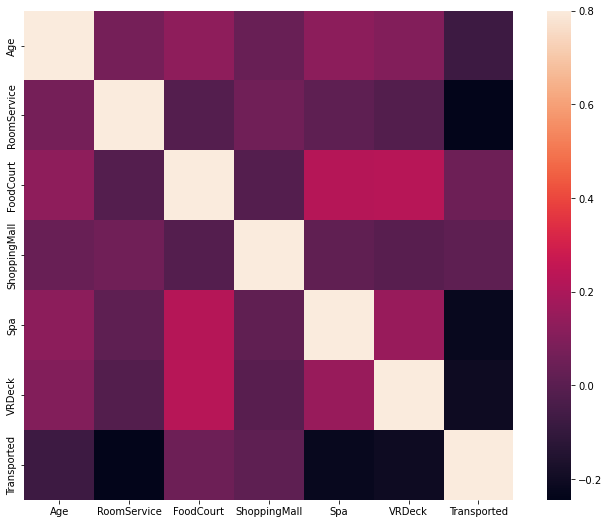

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:title={'center':'VRDeck'}, xlabel='Transported'>

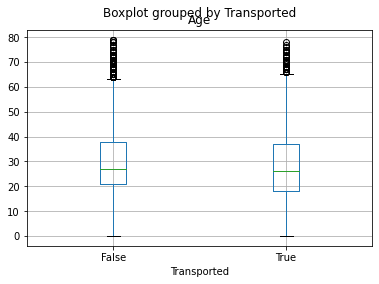

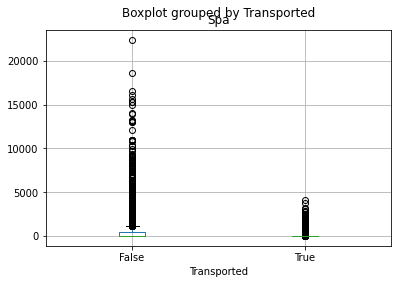

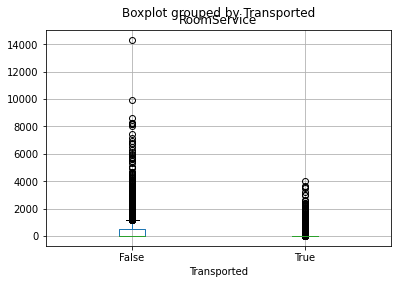

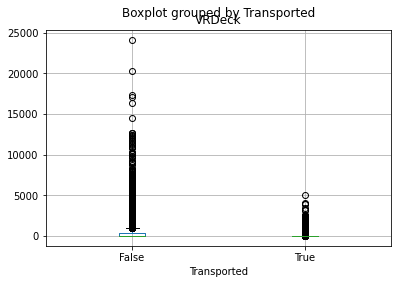

In [8]:

train_data.boxplot(column=['Age'], by='Transported')
train_data.boxplot(column=['Spa'], by='Transported')
train_data.boxplot(column=['RoomService'], by='Transported')
train_data.boxplot(column=['VRDeck'], by='Transported')




# Cleaning the data
By Correcting, Completing, Creating, Converting

In [9]:
X = train_data.copy()
X_test = test_data.copy()

y = X['Transported']
X.drop(['Transported'], axis=1, inplace=True)


all_dfs = [X, X_test]

X_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Completeing

In [10]:
X.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

We will complete the categorial values with the most frequent, and the numerical values with the median value

In [11]:
print('X columns:\t', X.columns)
print('X_test columns:\t', X_test.columns)

# Categorical columns in the training data
object_cols = [col for col in X.columns if X[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_test[col]).issubset(set(X[col]))]
print('object_cols', object_cols)
print('good_label_cols', good_label_cols)

X columns:	 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
X_test columns:	 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
object_cols ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
good_label_cols ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


We will drop the 'Cabin' ans 'Name' columns

In [12]:
for df in all_dfs:
    df.drop(['Cabin', 'Name'], axis=1, inplace=True)

In [13]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                X[cname].dtype in ['int64', 'float64']]
numerical_cols_with_missing = [cname for cname in numerical_cols if 
                               X[cname].isnull().any()]
print('Numerical columns with missing values:', numerical_cols_with_missing)

Numerical columns with missing values: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [14]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]
categorical_cols_with_missing = [cname for cname in categorical_cols if
                                 X[cname].isnull().any()]
print('Categorial columns with missing values:', categorical_cols_with_missing)

Categorial columns with missing values: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


Adding a reporter column

In [15]:
# Adding a reporter column
for df in all_dfs:
    for col in numerical_cols_with_missing+categorical_cols_with_missing:
        df[col + '_was_missing'] = df[col].isnull()

In [16]:
from sklearn.impute import SimpleImputer

# Imputating numerical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_X = X[numerical_cols]
num_X_test = X_test[numerical_cols]
num_X_imp = pd.DataFrame(num_imputer.fit_transform(num_X))
num_X_test_imp = pd.DataFrame(num_imputer.transform(num_X_test))

cat_X = X[categorical_cols]
cat_X_test = X_test[categorical_cols]
cat_X_imp = pd.DataFrame(cat_imputer.fit_transform(cat_X))
cat_X_test_imp = pd.DataFrame(cat_imputer.transform(cat_X_test))


# imputation removed column names; put them back
cat_X_imp.columns = cat_X.columns
cat_X_test_imp.columns = cat_X_test.columns

# imputation removed column names; put them back
num_X_imp.columns = num_X.columns
num_X_test_imp.columns = num_X_test.columns

X_imp = pd.concat([cat_X_imp, num_X_imp], axis=1)
X_test_imp = pd.concat([cat_X_test_imp, num_X_test_imp], axis=1)

all_dfs = [X_imp, X_test_imp]

print('X_imp:')
print(X_imp.isnull().sum())
print('X_test_imp')
print(X_test_imp.isnull().sum())



X_imp:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
X_test_imp
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


## Creating

In [17]:
for df in all_dfs:
    df.index = df['PassengerId']
    temp = df['PassengerId'].str.split('_', expand=True)
    df['Group'] = temp.loc[:,0]
    df['GroupSize'] = df.groupby('Group').Group.transform('count')  # Add the group size as a 
    df.drop(['PassengerId', 'Group'], axis=1, inplace=True)



In [18]:
X_imp.head()

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,39.0,0.0,0.0,0.0,0.0,0.0,1
0002_01,Earth,False,TRAPPIST-1e,False,24.0,109.0,9.0,25.0,549.0,44.0,1
0003_01,Europa,False,TRAPPIST-1e,True,58.0,43.0,3576.0,0.0,6715.0,49.0,2
0003_02,Europa,False,TRAPPIST-1e,False,33.0,0.0,1283.0,371.0,3329.0,193.0,2
0004_01,Earth,False,TRAPPIST-1e,False,16.0,303.0,70.0,151.0,565.0,2.0,1


## Converting

In [19]:
categorical_cols = [cname for cname in X_imp.columns if
                    X_imp[cname].dtype == "object"]

low_cardinality_cols = [col for col in categorical_cols if X_imp[col].nunique() < 10]
high_cardinality_cols = [col for col in categorical_cols if X_imp[col].nunique() >= 10]

print('low_cardinality_cols', low_cardinality_cols)
print('high_cardinality_cols', high_cardinality_cols)


low_cardinality_cols ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
high_cardinality_cols []


### Encode the OneHot encoder

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_imp[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_imp[low_cardinality_cols]))

# Getting column nsames back
OH_cols_train.columns = OH_encoder.get_feature_names_out()
OH_cols_test.columns = OH_encoder.get_feature_names_out()

# One-hot encoding removed index; put it back
OH_cols_train.index = X_imp.index
OH_cols_test.index = X_test_imp.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X_imp.drop(categorical_cols, axis=1)
num_X_test = X_test_imp.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [21]:
OH_X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
PassengerId,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
OH_X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
PassengerId,,,,,,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Breaking the data

## Using one break

In [23]:
from sklearn.model_selection import train_test_split

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(OH_X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)

### Defining a model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_xg = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)

model_rf.fit(X_train, y_train)
model_xg.fit(X_train, y_train)

preds_rf_1 = model_rf.predict(X_valid)
preds_xg_1 = model_xg.predict(X_valid)

print(accuracy_score(y_valid, preds_rf_1))
print(accuracy_score(y_valid, preds_xg_1))

0.7776073619631901
0.7787576687116564


## Using cross-validation

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate


cv_split = ShuffleSplit(n_splits = 10, test_size = 0.3, train_size = 0.6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
cv_results_rf = cross_validate(model_rf, OH_X, y, cv=cv_split)
cv_results_xg = cross_validate(model_xg, OH_X, y, cv=cv_split)

preds_rf_2 = model_rf.predict(OH_X)
preds_xg_2 = model_xg.predict(OH_X)

print(accuracy_score(y, preds_rf_2))
print(accuracy_score(y, preds_xg_2))

0.9042908086966525
0.877372598642586


In [26]:
preds_test = model_xg.predict(OH_X_test)
output = pd.DataFrame({'PassengerId': X_test_imp.index, 'Transported': preds_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [27]:
from sklearn.model_selection import GridSearchCV
 
def find_params(param_grid, X_train, X_test, y_train, clf):
  cv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, scoring= 'f1_macro', n_jobs =-1)
  cv_clf.fit(X_train, y_train)
  y_pred_test = cv_clf.predict(X_test)
  y_pred_train = cv_clf.predict(X_train)
  return cv_clf, y_pred_test, y_pred_train

In [28]:
param_grid = {
    'n_estimators': [10, 50, 100], # The number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # The number of features to consider when looking for the best split
    'min_samples_split': [1, 2, 8, 16], # The minimum number of samples required to split an internal node
    'criterion': ['entropy', 'gini'] # The function to measure the quality of a split
      }

In [29]:
cv_rdc, y_pred_test_rdc, y_pred_train_rdc = find_params(param_grid, X_train, X_valid, y_train, RandomForestClassifier())
#print the parameters which give the best score
print(cv_rdc.best_params_)
preds_rf_3 = cv_rdc.predict(OH_X)
print(accuracy_score(y, preds_rf_3))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/par

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 16, 'n_estimators': 50}
0.8480386517887956


In [30]:
preds_rf_3 = cv_rdc.predict(OH_X)
print(accuracy_score(y, preds_rf_3))

0.8480386517887956


In [31]:
preds_test_3 = cv_rdc.predict(OH_X_test)
output = pd.DataFrame({'PassengerId': X_test_imp.index, 'Transported': preds_test_3})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
